# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
archive_df = pd.read_csv('twitter_archive_enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#  Downloading the .tsv file from the URL, then opening the downloaded file to a new file called image_predictions.tsv
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
    
# Reading the downloaded .tsv file into a dataframe
image_predictions_df = pd.read_csv('image_predictions.tsv', '\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Extracting each tweet's the ID, retweet count and favourite count from the twet_json.txt file

tweets_list = []

with open ('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        tweet_retweet_count = tweets['retweet_count']
        tweet_favorite_count = tweets['favorite_count']
        tweets_list.append({'tweet_id': tweet_id,
                            'tweet_retweet_count': tweet_retweet_count,
                            'tweet_favorite_count': tweet_favorite_count})

api_df = pd.DataFrame(tweets_list)
api_df.head()

,tweet_favorite_count,tweet_id,tweet_retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# Assesing each column's datatype

archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The **timestamp** and **retweeted_status_timestamp** columns have incorrect datatypes - object to datetime

In [6]:
# Assesing Twitter archive if there are any reteets

archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None


- The **retweeted_status_user_id**, **retweeted_status_id**, **in_reply_to_status_id** and **in_reply_to_user_id** columns contain IDs in them which means that there are retweets and replies that need to be removed.
- Some of the dog stages have the stage name as the values

In [7]:
# Assessing the statistical summary for any possible outliers

archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The rating_numerator column has 1776 has the highest rating, which one can assume is an outlier. The rating_denominator column has a denominator of 170, which is invalid because ratings are out of 10, meaning this is an outlier.

In [8]:
# Assessing the rating_numerator column in more detail

archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

When trying to determine what would be valid and invalid numerator ratings, we can see that 14 has a decent amount of ratings **(54)** with that rating compared to numbers higher than it, mean we can conclude that ratings higher than 14 are invalid rating to work with.

In [9]:
# Assessing the rating_denominator column in more detail

archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
# Assesing whether the dataframe has null values and by how much in each column

archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are NULL values in a few of the columns

In [11]:
# Assessing all the unique dog names

archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

There are invalid dog names such as 'None', 'a', 'not', 'just' etc.

In [12]:
# Assesing if this dataframe has any duplicates

sum(archive_df.tweet_id.duplicated())

0

There are no duplicates found in the twitter archive dataframe

In [13]:
# Assesing each column's datatype

image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Assesing whether the dataframe has null values and by how much in each column

image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

There are no NULL values in this dataframe

In [15]:
# Assessing the amount of duplicates in the image predictions dataframe

sum(image_predictions_df.tweet_id.duplicated())

0

There are no duplicates found in the image predictions dataframe

In [16]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True
871,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False


When we look at columns **p1**, **p2** and **p3**, the image names are a mixture of uppercase as well as lowercase formatting

In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_favorite_count    2354 non-null int64
tweet_id                2354 non-null int64
tweet_retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


There are no NULL values as well as incorrect datatypes

In [18]:
# Assessing the amount of duplicates in API dataframe

sum(api_df.tweet_id.duplicated())

0

There are no duplicates found in the API dataframe 

### Quality issues
1. The Twitter archive data has an incorrect datatypes - timestamp is currently a string/object, when it should be a datetime datatype.

2. The Twitter archive data has tweets from Auguest 1, 2017 and older. The instructins states that those tweets need to be removed

3. The Twitter archive data has inconsistency issues with some of the denominator ratings that not equal to 10.

4. The Twitter archive data has inconsistency issues with some of the numerator ratings higher than 14.

5. The Twitter archive data contains retweets and replies. Instructions stipulates that only original tweets should be used.

2. The Twitter archive data has missing values - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, expanded_urls.

6. The Twitter archive data has invalid dogs names - 'None', 'a'

8. The images in the image predictions file in the **p1**, **p2** and **p3** columns, are either lowercase or uppercase

### Tidiness issues
1. The **doggo**, **floofer**, **pupper** and **puppo** columns in the Twitter archive can be combined into one column because those names can be treated as categories.

2. All the dataframes can be combined into one dataframe - tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
api_clean = api_df.copy()

## Quality issues

### Issue #1: Incorrect data type

#### Define:  The Twitter archive data has an incorrect datatype - _timestamp_ is currently a string/object, when it should be a datetime datatype

#### Code

In [20]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

#### Test

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Issue #2: Excluding tweets after a certain date

#### Define
- Excluding tweets that are from August 1st, 2017 onwards

#### Code

In [22]:
# Filtering the data to only contain tweets before August 1, 2017

archive_clean = archive_clean.query("timestamp < '2017-08-01'")

#### Test

In [23]:
# Assessing if tweets from August 1, 2017 onwards are still in the showing up

archive_clean.query("timestamp >= '2017-08-01'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


This test shows that the tweets tweeted on the stated date and onwards are no longer in the dataset

### Issue #3 & #4: Excluding invalid numerator and denominator ratings

#### Define:  Tweets with denominator ratings that are not equal to 10 and numerator ratings that are higher than 14 need to be excluded

#### Code

In [24]:
archive_clean = archive_clean.loc[(archive_clean.rating_numerator <= 14) & (archive_clean.rating_denominator == 10)]

#### Test

In [25]:
archive_clean.loc[(archive_clean.rating_numerator > 14) & (archive_clean.rating_denominator != 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


This test shows that the tweets with denominator ratings that are not equal to 10 and numerator ratings that are higher than 14 have been removed

### Issue #5: Excluding tweets with retweets and replies and removing uneeded columns

#### Define: The Twitter archive data contains retweets and replies -  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id

#### Code

Before removing the uneeded columns, it would be best to remove the remove the retweets and replies in the data frame first. Before those tweets can be removed, those specfic column datatypes have to be a string/object datatypes.

In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2319 non-null int64
in_reply_to_status_id         68 non-null float64
in_reply_to_user_id           68 non-null float64
timestamp                     2319 non-null datetime64[ns]
source                        2319 non-null object
text                          2319 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null datetime64[ns]
expanded_urls                 2269 non-null object
rating_numerator              2319 non-null int64
rating_denominator            2319 non-null int64
name                          2319 non-null object
doggo                         2319 non-null object
floofer                       2319 non-null object
pupper                        2319 non-null object
puppo                         2319 non-null object
dtypes: datetime

Currently those columns are a floats, now we have to convert them to a string/object

In [27]:
# Converting the column's datatypes

archive_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id']] = archive_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id']].astype(str)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2319 non-null int64
in_reply_to_status_id         2319 non-null object
in_reply_to_user_id           2319 non-null object
timestamp                     2319 non-null datetime64[ns]
source                        2319 non-null object
text                          2319 non-null object
retweeted_status_id           2319 non-null object
retweeted_status_user_id      2319 non-null object
retweeted_status_timestamp    178 non-null datetime64[ns]
expanded_urls                 2269 non-null object
rating_numerator              2319 non-null int64
rating_denominator            2319 non-null int64
name                          2319 non-null object
doggo                         2319 non-null object
floofer                       2319 non-null object
pupper                        2319 non-null object
puppo                         2319 non-null object
dtypes: dateti

In [28]:
#Removing the tweets that have a value in the 'in_reply_to_status_id' column
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.str.contains(pat = '^\d\.\d+', regex=True) == False]

#Removing the tweets that have a value in the 'retweeted_status_id' column
archive_clean = archive_clean[archive_clean.retweeted_status_id.str.contains(pat = '^\d\.\d+', regex=True) == False]

archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


The results above shows that the tweets that had retweets and replies have been filtered out, now the uncessesary columns can be removed from the dataframe

In [29]:
# Removing columns that won't be needed

archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [30]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


### Issue #6: Missing values

#### Define: The expanded_urls column has missing values

#### Code

In [31]:
# Assessing how many missing values the expanded_urls column has

archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         3
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

Since the expanded_urls column has only 3 missing values, I will drop them as it is unlikely that removing them will skew the results

In [32]:
# Dropping the rows with missing values

archive_clean = archive_clean.dropna()

#### Test

In [33]:
# Assessing to see if there are any missing values after removing them
archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue 7:  There are invalid dogs names

#### Define: The _name_ column has invalid names - 'None',  'a',  'just' etc. that need to be removed

#### Code

When looking at the list of names closely one can see that the all invalid names begin with a lowercase letter execpt for 'None', that would mean one can assume that those are the only one to be removed

In [34]:
archive_clean.name.unique()

array(['Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey', 'Cassie',
       'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke',
       'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
    

In [35]:
# Excluding names that begin with a lowercase letter

archive_clean = archive_clean[archive_clean.name.str.contains(pat = '^[a-z]', regex=True) == False]

# Excluding names that begin are 'None'
archive_clean = archive_clean[archive_clean.name.str.contains("None") == False]

#### Test

In [36]:
archive_clean.name.unique()

array(['Archie', 'Darla', 'Franklin', 'Jax', 'Zoey', 'Cassie', 'Koda',
       'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus',
       'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus', 'Derek', 'Roscoe',
       'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin', 'Yogi',
       'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy',
       'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo',
       'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn',
       'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Lorenzo', 'Carl'

### Issue #8: The image names have inconsistent formatting

#### Define: Some of the image names in the _image_predictions_ are a mixture of lowercase and uppercase

#### Code

In [37]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [38]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Tidiness issues

### Issues #1: The dog stages can be put into one category column

#### Define: The **doggo**, **floofer**, **pupper** and **puppo** columns can be combined into one column because those names can be treated as categories

#### Code

In [39]:
# Replacing the 'None' values with an empty string

dog_stage_columns = ["doggo","floofer","pupper","puppo"]
archive_clean[dog_stage_columns] = archive_clean[dog_stage_columns].replace({'None':''})

# Joining all the dog stage columns into a new column - combined_stages

archive_clean['combined_stages'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,combined_stages
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,


In [40]:
# Assessing the counts for each value

archive_clean.combined_stages.value_counts()

               1199
pupper          120
doggo            38
puppo            16
floofer           5
doggopupper       4
Name: combined_stages, dtype: int64

We can see that the **combined_stages** column has dogs that fall under two stages. To be able to make an analysis with it, we would need to add a separator between the two

In [41]:
# Splitting 'doggopupper' to 'doggo, pupper'

archive_clean = archive_clean.replace(to_replace = ['doggopupper'], value = 'doggo, pupper')
archive_clean.combined_stages.value_counts()

                 1199
pupper            120
doggo              38
puppo              16
floofer             5
doggo, pupper       4
Name: combined_stages, dtype: int64

In [42]:
# Extracting the stage names and putting them into a new column - stage

archive_clean['stage'] = archive_clean.combined_stages.str.extract('(\s*[a-z]+)')
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,combined_stages,stage
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,,NaN


In [43]:
# Dropping uneeded columns

archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'combined_stages'], axis= 1, inplace = True)

#### Test

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN


### Issue #2: All three datasets have a smilar column in common

#### Define: Merging all three datasets into one dataframe - **tweet_id**

#### Code

In [45]:
master_dataframe = reduce(lambda left, right: pd.merge(left , right, on = ["tweet_id"]), [archive_clean, image_predictions_clean, api_clean])

#### Test

In [46]:
master_dataframe.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_favorite_count,tweet_retweet_count
352,796149749086875649,2016-11-09 00:37:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She just turned on the news. Off...,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,NaN,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,...,0.600276,True,labrador_retriever,0.140798,True,seat_belt,0.087355,False,36177,16628
1247,669571471778410496,2015-11-25 17:40:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,NaN,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,...,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False,1684,1085
739,709556954897764353,2016-03-15 01:48:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,NaN,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,...,0.790026,True,kuvasz,0.105031,True,labrador_retriever,0.087051,True,3593,1204


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
master_dataframe.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [48]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_favorite_count,tweet_retweet_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774


In [49]:
# which top 5 dogs had the most amount of retweets

df_names = df.groupby('name')['tweet_retweet_count'].count().nlargest(5)
df_names.sort_values(ascending=False)

name
Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Name: tweet_retweet_count, dtype: int64

In [50]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,tweet_favorite_count,tweet_retweet_count
count,1.341000e+03,1341.000000,1341.0,1341.000000,1341.000000,1.341000e+03,1.341000e+03,1341.000000,1341.000000
mean,7.444464e+17,10.704698,10.0,1.211782,0.601612,1.338267e-01,6.025271e-02,9365.697241,2737.504101
std,6.870390e+16,1.917916,0.0,0.575530,0.274085,1.008456e-01,5.139664e-02,11655.340088,3959.172802
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,107.000000,23.000000
25%,6.800705e+17,10.000000,10.0,1.000000,0.367818,5.133470e-02,1.529690e-02,2369.000000,708.000000
50%,7.240463e+17,11.000000,10.0,1.000000,0.600985,1.180890e-01,4.914760e-02,4851.000000,1540.000000
75%,8.011151e+17,12.000000,10.0,1.000000,0.868658,1.975130e-01,9.392850e-02,12217.000000,3344.000000
max,8.918152e+17,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,107956.000000,56625.000000


In [51]:
#  Assessing the frequency of each dog stage
df.stage.value_counts()

pupper     116
doggo       40
puppo       15
floofer      5
Name: stage, dtype: int64

### Insights:
1. Looking at this statistal view, we can see there is pattern here where people prefer to 'like' a tweet than 'retweet' it into their timelines. The minimum about of likes/favorite count is 107 where as the retweets are only 23. In addition the maximum amount of likes is 107 956 and 56 625 retweets.

2. The top 3 dogs with the most retweets are **Charlie**, **Oliver** and **Lucy**

3. The stage _pupper_ has the most of amount of dogs **(116)** which is understandable because this stage is made up of puppies.

### Visualization

In [52]:
# Assessing the frequency of the numerators

numerator_ratings = df.rating_numerator.value_counts()
numerator_ratings

12    326
11    301
10    272
13    174
9     100
8      70
7      32
14     17
6      17
5      14
3      10
4       5
2       3
Name: rating_numerator, dtype: int64

Text(0.5,1,'Ratings by frequency')

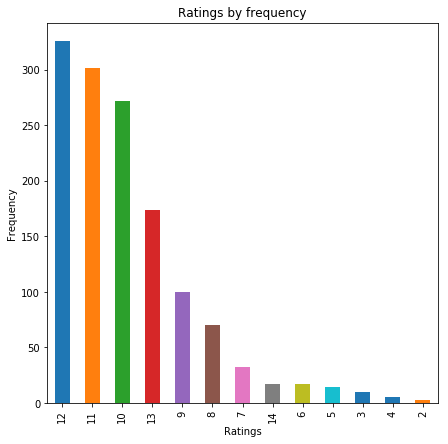

In [53]:
numerator_ratings.plot(kind='bar', figsize=(7,7))
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings by frequency")

Looking at the frequency of each rating using **value_counts()**, with the bar graph we can accurately see most of the ratings are between 10-12 out of 10

In [54]:
# Assessing if there is a correlation between the retweets count and favourite count numbers

retweets_favourite_correlation = df['tweet_favorite_count'].corr(df['tweet_retweet_count'])
retweets_favourite_correlation

0.92278700492249321

Text(0.5,1,'Favourite count vs. Retweet count')

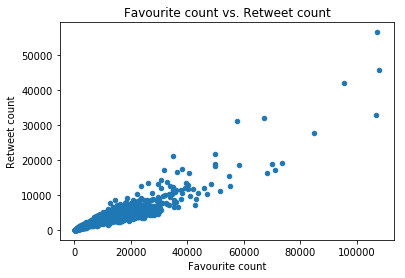

In [55]:
# 

df.plot(kind='scatter', x='tweet_favorite_count', y='tweet_retweet_count')
plt.xlabel('Favourite count')
plt.ylabel('Retweet count')
plt.title('Favourite count vs. Retweet count')